# GRIP June'21 - The Sparks Foundation

## Data Science and Business Analytics 

## Author: Smriti Gupta

### Task 3: Prediction using Decision Tree Algorithm

* Create the Decision Tree classifier and visualize it graphically. 
* The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 
* _LANGUAGE:_ Python
* _DATASET:_ https://bit.ly/3kXTdox

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
%matplotlib inline
%config Completer.use_jedi = False

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the iris Dataset and Define the input and output variables

iris=datasets.load_iris()

X = pd.DataFrame(iris.data, columns=iris.feature_names)
print(X.head(10))

y = iris.target
print(y)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1

In [4]:
# Shape of the Dataset

X.shape

(150, 4)

In [5]:
# Checking the information of Data

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [6]:
# Checking the statistical details of Data

X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking for null values

X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# Splitting the Dataset into train and test sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Defining the Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the decision tree classifier
dtree = DecisionTreeClassifier()

# Fit the model with the training data X_train and y_train
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created Successfully')

Decision Tree Classifer Created Successfully


### Predicting the Class

In [10]:
pred = dtree.predict(X_test)

### Classification Report

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



### Confusion Matrix

In [13]:
print(confusion_matrix(y_test,pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [14]:
# Importing Libraries for Tree Visualization

from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz 
import matplotlib.image as mpimg

# Visualizing the  Decision Tree Classifier

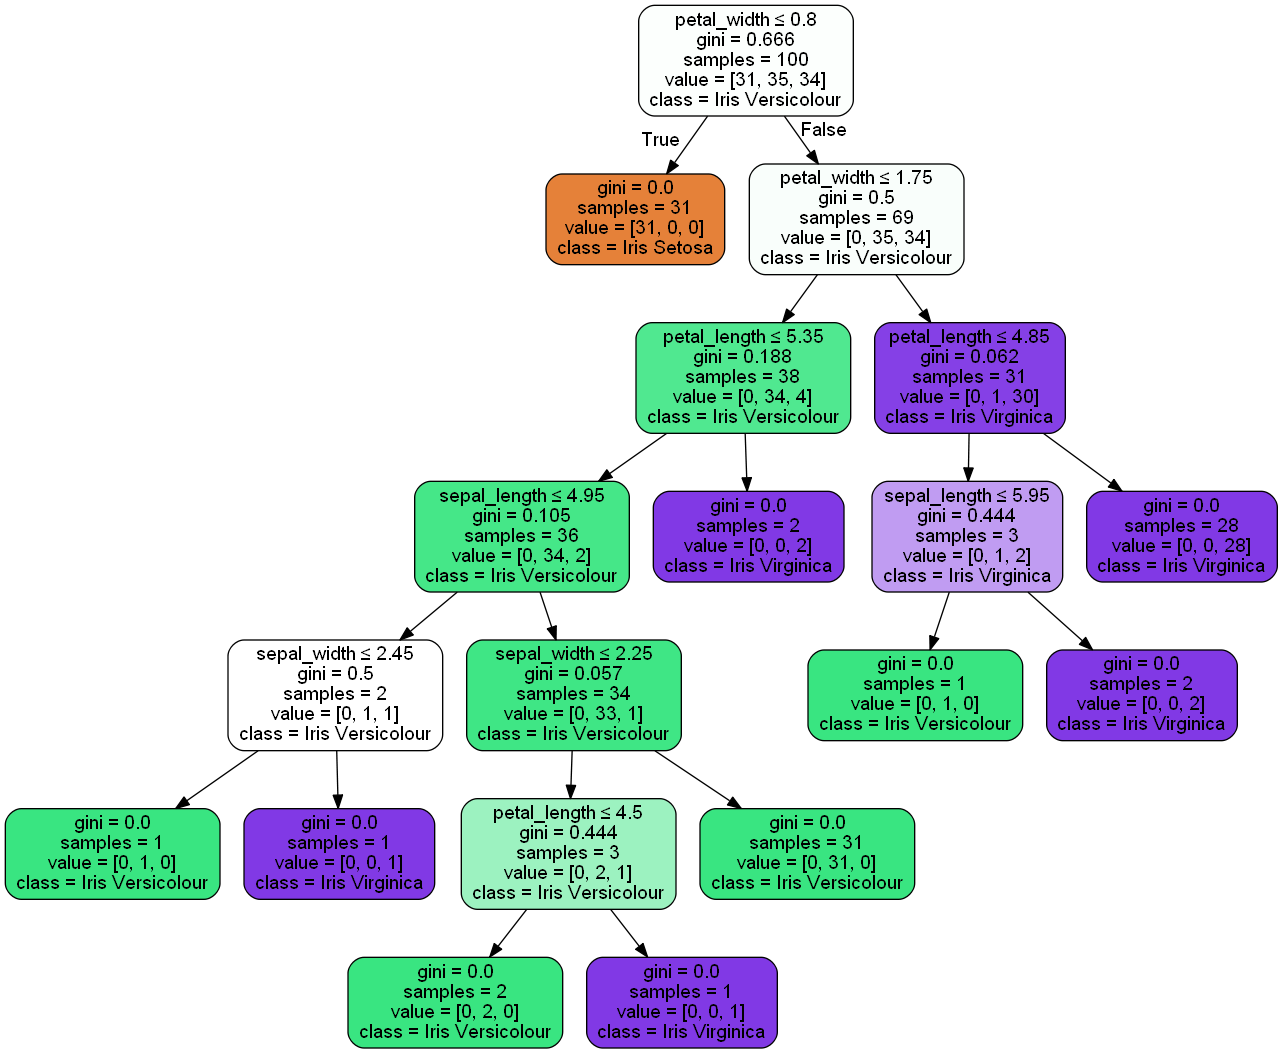

In [15]:
# Initialize a StringIO class
dot_data = StringIO()

feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] #input values
class_names = ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'] #output values

# Convert the decision tree model into dot data
out = export_graphviz(dtree,
                      feature_names=feature_names,
                      out_file=dot_data,
                      class_names=class_names,
                      filled=True,
                      special_characters=True,
                      rotate=False,
                     rounded=True)

# Convert the dot data into a graph
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())